In [1]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pdb

In [2]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2024September')

In [3]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

In [ ]:
# ----- FUNCTIONS -----

# find first sniff
# - filter to sniffs
# - get min start time

# find first huddle after sniff
# - filter to huddles
# - find min time > sniff time

def find_first_behavior(behavior,mintime):
    

In [4]:
# ----- WORKS TO: GET FIRST SNIFF, GET NEXT HUD -----

data['first_sniff'] = data[data.behavior=='Sniff'].groupby(['pair_tag','assay'])['start_time'].transform('min')
data['first_sniff_all'] = data.groupby(['pair_tag','assay'])['first_sniff'].transform(lambda x: np.unique(x)[0])

huds = data[data.behavior=='Huddle']
huds['use_huds'] = huds.start_time>huds.first_sniff_all
huds['next_hud'] = huds[huds.use_huds==True].groupby(['pair_tag','assay'])['start_time'].transform('min')
reorg = pd.pivot_table(huds, values=['first_sniff_all','next_hud'],index=['pair_tag','sex','GT','assay','pair_num'],aggfunc="mean").reset_index()
reorg['delta'] = reorg.next_hud-reorg.first_sniff_all

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_18700\3494697763.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huds['use_huds'] = huds.start_time>huds.first_sniff_all
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_18700\3494697763.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huds['next_hud'] = huds[huds.use_huds==True].groupby(['pair_tag','assay'])['start_time'].transform('min')


In [41]:
saveplots = True

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_18700\4232456508.py:23: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.pointplot(


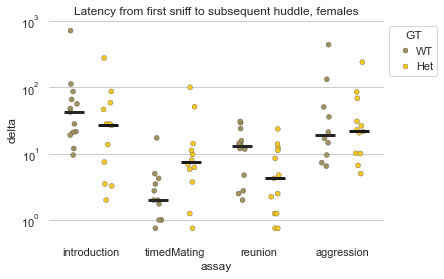

In [42]:
# ----- PLOT DELTAS, FEMALE -----
sns.set_theme(style="whitegrid")
fonly = reorg[reorg.sex=='F']
upal = fpal
order = ['introduction','timedMating','reunion','aggression']
fname = 'firstSniffToHuddleLatency_females.png'

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=fonly, y="delta", x="assay", hue="GT",
    dodge=True, alpha=1, zorder=1, #legend=False,
    log_scale=(None,10),hue_order=ho,palette=upal,
    order=order,size=5,edgecolor='k',linewidth=0.25,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=fonly, y="delta", x="assay", hue="GT",
    dodge=.8 - .8 / 2, errorbar=None,estimator='median',
    markers="_", markersize=20, linestyle="none",
    log_scale=(None,10),hue_order=ho,legend=False,
    order=order,color='k',markeredgewidth=3,
)

# Improve the legend
sns.move_legend(
    ax, loc="upper left", bbox_to_anchor=(1, 1), frameon=True, columnspacing=1, handletextpad=0,
)

ax.set_title('Latency from first sniff to subsequent huddle, females')


if saveplots:
    f.savefig(os.path.join(outp,fname))

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_18700\3973896305.py:24: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.pointplot(


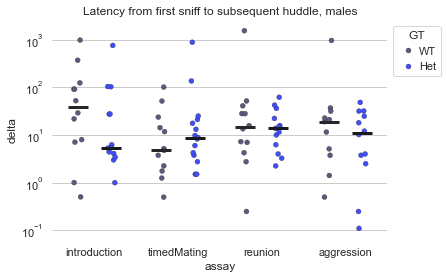

In [43]:
# ----- PLOT DELTAS, MALE -----
fonly = reorg[reorg.sex=='M']
upal = mpal
fname = 'firstSniffToHuddleLatency_males.png'

sns.set_theme(style="whitegrid")
order = ['introduction','timedMating','reunion','aggression']

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=fonly, y="delta", x="assay", hue="GT",
    dodge=True, alpha=1, zorder=1, # legend=False,
    log_scale=(None,10),hue_order=ho,palette=upal,
    order=order,size=5,edgecolor='k',linewidth=0.25,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=fonly, y="delta", x="assay", hue="GT",
    dodge=.8 - .8 / 2, errorbar=None,estimator='median',
    markers="_", markersize=20, linestyle="none",
    log_scale=(None,10),hue_order=ho,
    order=order,color='k',markeredgewidth=3,legend=False,
)

# Improve the legend
sns.move_legend(
    ax, loc="upper left", bbox_to_anchor=(1, 1), frameon=True, columnspacing=1, handletextpad=0,
)

ax.set_title('Latency from first sniff to subsequent huddle, males')

if saveplots:
    f.savefig(os.path.join(outp,fname))

In [ ]:
# ----- LOOP OVER TEST GROUPS AND INDIVIDUALS -----